## Adding necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("merged_students_responses.csv")

In [3]:
df.head()

,Row,Response Text,Question,Score,Name,StudentsResponse3
0,1.0,Matter is anything that occupies space and has...,Define matter,10.0,Madison King,NaN
1,2.0,Matter is stuff that you can see and touch.,Define matter,6.0,Ethan Miller,NaN
2,3.0,Anything that weighs something is matter.,Define matter,7.0,Olivia Jones,NaN
3,4.0,Matter is like the building blocks of the worl...,Define matter,8.0,William Brown,NaN
4,5.0,"There are hot, cold, and squishy versions of m...",Define matter,5.0,Sophia Garcia,NaN


In [4]:
df.shape

(485, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row                458 non-null    float64
 1   Response Text      485 non-null    object 
 2   Question           471 non-null    object 
 3   Score              470 non-null    float64
 4   Name               470 non-null    object 
 5   StudentsResponse3  27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 22.9+ KB


In [6]:
df.describe()

,Row,Score,StudentsResponse3
count,458.000000,470.000000,27.000000
mean,251.606987,7.202128,180.000000
std,147.282349,2.384115,7.937254
min,1.000000,0.000000,167.000000
25%,115.250000,7.000000,173.500000
50%,265.500000,8.000000,180.000000
75%,379.750000,9.000000,186.500000
max,494.000000,10.000000,193.000000


In [7]:
df.isnull().sum()

Row                   27
Response Text          0
Question              14
Score                 15
Name                  15
StudentsResponse3    458
dtype: int64

## dropping rows with null values

In [8]:
df.dropna(subset =["Score"], inplace = True)
df.isnull().sum()

Row                   26
Response Text          0
Question               0
Score                  0
Name                   0
StudentsResponse3    444
dtype: int64

## Dropping useless columns

In [9]:
df.drop(['Row', 'StudentsResponse3', 'Question'], axis = 1, inplace = True)

In [10]:
df.head()

,Response Text,Score,Name
0,Matter is anything that occupies space and has...,10.0,Madison King
1,Matter is stuff that you can see and touch.,6.0,Ethan Miller
2,Anything that weighs something is matter.,7.0,Olivia Jones
3,Matter is like the building blocks of the worl...,8.0,William Brown
4,"There are hot, cold, and squishy versions of m...",5.0,Sophia Garcia


#### Distribution of Score

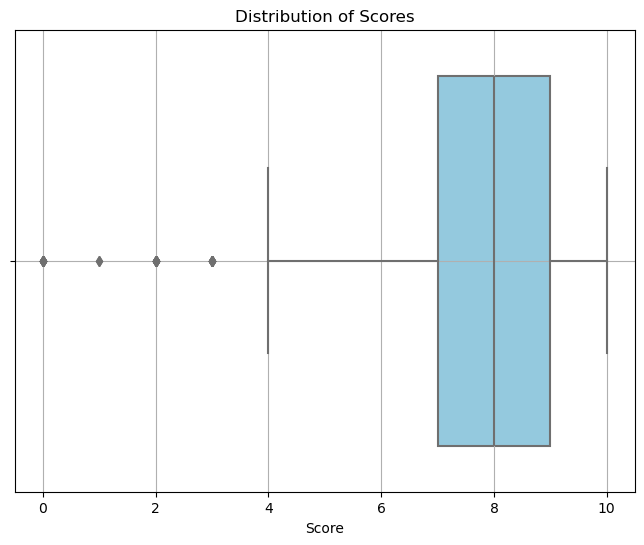

In [11]:
import seaborn as sns

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', data=df, color='skyblue')
plt.xlabel('Score')
plt.title('Distribution of Scores')
plt.grid(True)
plt.show()


## NLP preprocessing

### converting response text to lower case

In [12]:
df['Response Text'] = df['Response Text'].apply(lambda x: x.lower())
df.head()

,Response Text,Score,Name
0,matter is anything that occupies space and has...,10.0,Madison King
1,matter is stuff that you can see and touch.,6.0,Ethan Miller
2,anything that weighs something is matter.,7.0,Olivia Jones
3,matter is like the building blocks of the worl...,8.0,William Brown
4,"there are hot, cold, and squishy versions of m...",5.0,Sophia Garcia


### removing stop words

In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
df['Response Text'] = df['Response Text'].apply(remove_stopwords)
print(df.head())

                                       Response Text  Score           Name
0               matter anything occupies space mass.   10.0   Madison King
1                            matter stuff see touch.    6.0   Ethan Miller
2                  anything weighs something matter.    7.0   Olivia Jones
3  matter like building blocks world, made tiny t...    8.0  William Brown
4  hot, cold, squishy versions matter, like solid...    5.0  Sophia Garcia


### Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)
df['Response Text'] = df['Response Text'].apply(lemmatize_text)
print(df.head())

                                       Response Text  Score           Name
0               matter anything occupies space mass.   10.0   Madison King
1                            matter stuff see touch.    6.0   Ethan Miller
2                  anything weighs something matter.    7.0   Olivia Jones
3  matter like building block world, made tiny th...    8.0  William Brown
4  hot, cold, squishy version matter, like solid,...    5.0  Sophia Garcia


### Removing Special Characters

In [18]:
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

df['Response Text'] = df['Response Text'].apply(remove_special_characters)

df.head()

,Response Text,Score,Name
0,matter anything occupies space mass,10.0,Madison King
1,matter stuff see touch,6.0,Ethan Miller
2,anything weighs something matter,7.0,Olivia Jones
3,matter like building block world made tiny things,8.0,William Brown
4,hot cold squishy version matter like solid liq...,5.0,Sophia Garcia


### Tokenization

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [22]:
df['Tokenized Text'] = df['Response Text'].apply(tokenize_text)
df.head()

,Response Text,Score,Name,Tokenized Text
0,matter anything occupies space mass,10.0,Madison King,"[matter, anything, occupies, space, mass]"
1,matter stuff see touch,6.0,Ethan Miller,"[matter, stuff, see, touch]"
2,anything weighs something matter,7.0,Olivia Jones,"[anything, weighs, something, matter]"
3,matter like building block world made tiny things,8.0,William Brown,"[matter, like, building, block, world, made, t..."
4,hot cold squishy version matter like solid liq...,5.0,Sophia Garcia,"[hot, cold, squishy, version, matter, like, so..."


### word cloud

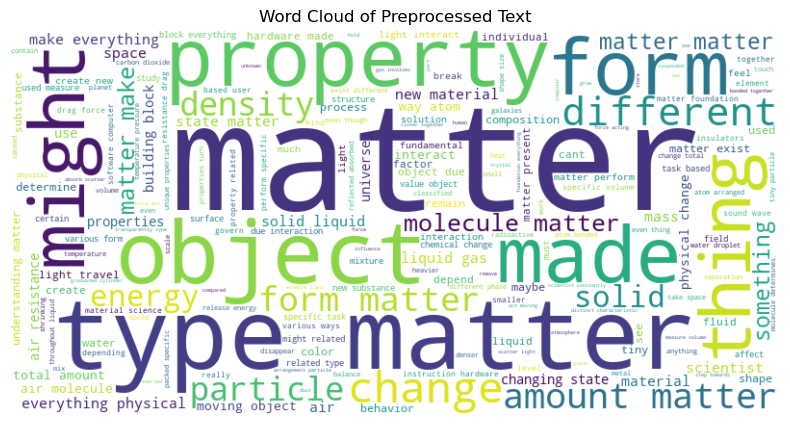

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Joining the tokenized text into a single string
preprocessed_text_str = ' '.join([' '.join(tokens) for tokens in df['Tokenized Text']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text_str)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Preprocessed Text')
plt.axis('off')
plt.show()


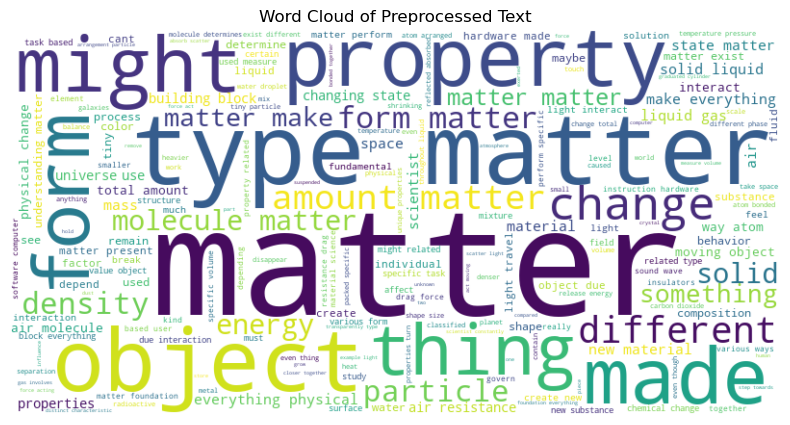

wordcloud.png


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with tokenized text
# Joining the tokenized text into a single string
preprocessed_text_str = ' '.join([' '.join(tokens) for tokens in df['Tokenized Text']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text_str)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Preprocessed Text')
plt.axis('off')

# Save the word cloud visualization as an image
wordcloud.to_file('wordcloud.png')
plt.show()
# Save DataFrame to JSON file
df.to_json('data.json')

# Print the path of the saved image file
print('wordcloud.png')


In [25]:
import subprocess

# Assuming df is your DataFrame
# Save DataFrame to JSON file
df.to_json('data.json')

# Execute load_model.py and pass the path of the JSON file as input
subprocess.run(['python', 'load_model.ipynb', 'data.json'])


CompletedProcess(args=['python', 'load_model.ipynb', 'data.json'], returncode=1)

### Vectorization

In [26]:
# here we can use tf-idf or bag of words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
tokenized_texts_as_strings = df['Tokenized Text'].apply(lambda tokens: ' '.join(tokens))
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(tokenized_texts_as_strings)
X_bow_array = X_bow.toarray()
df['Tokenized Text'] = list(X_bow_array)

In [29]:
df.head()

,Response Text,Score,Name,Tokenized Text
0,matter anything occupies space mass,10.0,Madison King,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,matter stuff see touch,6.0,Ethan Miller,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,anything weighs something matter,7.0,Olivia Jones,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,matter like building block world made tiny things,8.0,William Brown,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,hot cold squishy version matter like solid liq...,5.0,Sophia Garcia,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [30]:
# lets checkout the change we have done 
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()

,ability,able,absence,absorb,absorbed,absorbs,absorption,accelerator,act,acting,...,with,within,without,wood,work,works,world,would,written,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Word Frequency Distribution

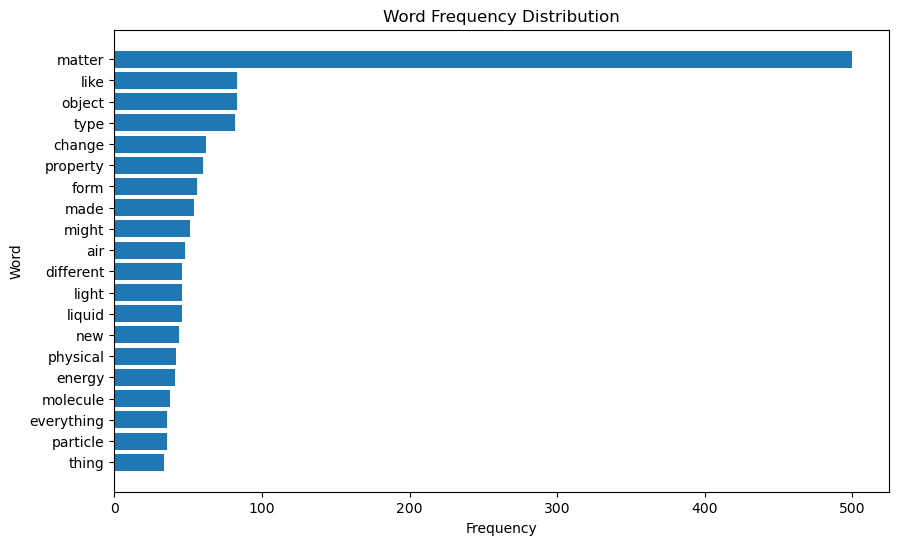

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_bow_array is your bag-of-words representation after vectorization
word_freq = np.sum(X_bow_array, axis=0)

# Assuming vectorizer.vocabulary_ contains the mapping of words to indices
# If not, you can use vectorizer.get_feature_names_out() to get the list of feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary mapping feature names to their frequencies
word_freq_dict = dict(zip(feature_names, word_freq))

# Sort the dictionary by frequency in descending order
sorted_word_freq_dict = dict(sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True))

# Plot the top N words by frequency
N = 20  # Change this value as needed
top_words = list(sorted_word_freq_dict.keys())[:N]
top_freqs = list(sorted_word_freq_dict.values())[:N]

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Word Frequency Distribution')

plt.gca().invert_yaxis()  # Invert y-axis to display most frequent words at the top

# Save the plot as a .png file
plt.savefig('word_freq_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()


## feature enginnering

In [32]:
# using TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_bow)

In [35]:
print(X_tfidf)

  (0, 771)	0.40322332056936644
  (0, 572)	0.5794326093204368
  (0, 514)	0.10902232971212067
  (0, 511)	0.4399403569368555
  (0, 31)	0.5442751316820729
  (1, 863)	0.5732591454330658
  (1, 804)	0.6348464125266147
  (1, 725)	0.505132166367399
  (1, 514)	0.11482804178604138
  (2, 926)	0.6916804260722997
  (2, 767)	0.4452049864370852
  (2, 514)	0.11168759656812263
  (2, 31)	0.5575810156495942
  (3, 938)	0.4558402905838439
  (3, 857)	0.37318950221576913
  (3, 848)	0.4338475113842936
  (3, 514)	0.09130817772716111
  (3, 500)	0.2754430806757994
  (3, 489)	0.23943165090896942
  (3, 91)	0.39518228141531947
  (3, 77)	0.408672162947756
  (4, 913)	0.43910150904595924
  (4, 781)	0.4684993153038475
  (4, 763)	0.2746130786620918
  (4, 514)	0.07564991077921342
  :	:
  (468, 623)	0.2518168143763892
  (468, 614)	0.29423644093940726
  (468, 585)	0.29423644093940726
  (468, 514)	0.05724369503447652
  (468, 383)	0.2857792503162248
  (468, 362)	0.21378858224347908
  (468, 280)	0.3888633861959831
  (468, 237)

### word importance

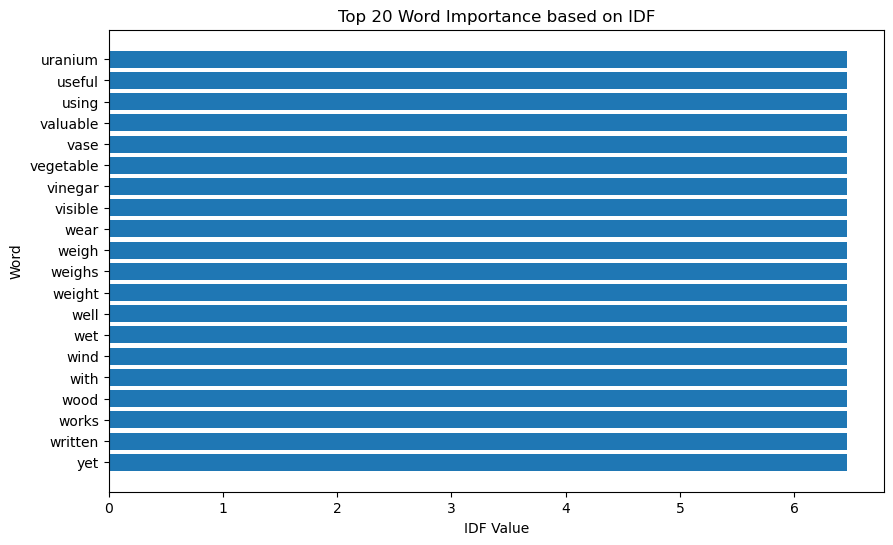

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_tfidf is your TF-IDF representation after transformation
idf_values = tfidf_transformer.idf_
feature_names = vectorizer.get_feature_names_out()
idf_dict = dict(zip(feature_names, idf_values))
sorted_idf_dict = dict(sorted(idf_dict.items(), key=lambda item: item[1]))
top_words = list(sorted_idf_dict.keys())[-N:]
top_idfs = list(sorted_idf_dict.values())[-N:]

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_idfs)
plt.xlabel('IDF Value')
plt.ylabel('Word')
plt.title('Top 20 Word Importance based on IDF')
plt.gca().invert_yaxis() 
plt.show()

## splitting the data

In [37]:
from sklearn.model_selection import train_test_split
X = X_tfidf
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### distribution of the target variable in your training and testing sets 

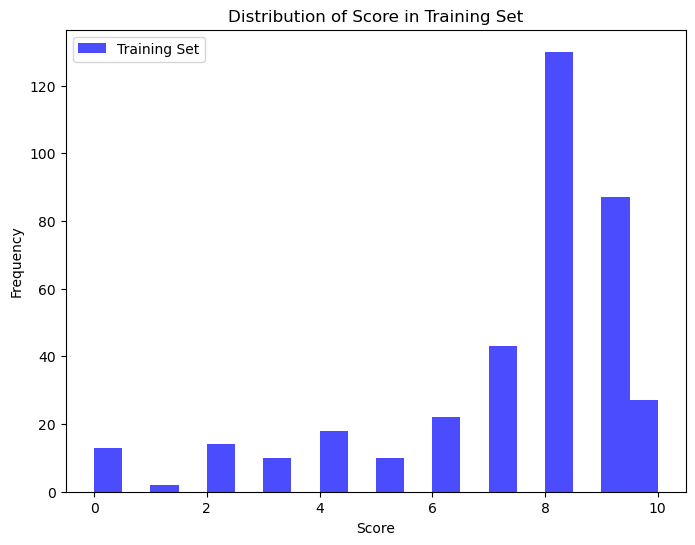

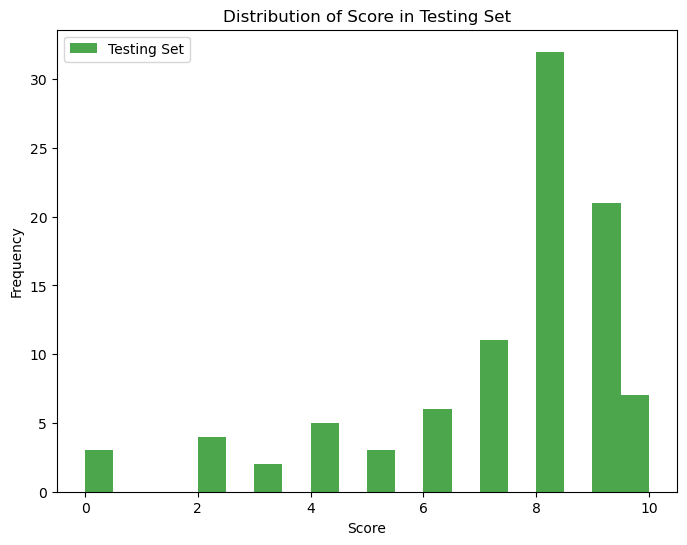

In [38]:
# Visualize the distribution of target variable in training set
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, color='blue', alpha=0.7, label='Training Set')
plt.title('Distribution of Score in Training Set')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('distribution_train.png', bbox_inches='tight')  # Save the plot as distribution_train.png
plt.show()

# Visualize the distribution of target variable in testing set
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, color='green', alpha=0.7, label='Testing Set')
plt.title('Distribution of Score in Testing Set')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('distribution_test.png', bbox_inches='tight')  # Save the plot as distribution_test.png
plt.show()

## Model Building

### Model Selection

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define candidate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Dictionary to store mean accuracy scores
mean_scores = {}

# Perform cross-validation and evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores[name] = scores.mean()
    print(f"{name}: Mean Accuracy - {scores.mean():.4f}, Std Dev - {scores.std():.4f}")

# Select the best model based on performance
best_model_name = max(mean_scores, key=mean_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Optionally, train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")


Logistic Regression: Mean Accuracy - 0.5827, Std Dev - 0.0525
Random Forest: Mean Accuracy - 0.6199, Std Dev - 0.0478
Support Vector Machine: Mean Accuracy - 0.5906, Std Dev - 0.0409

Best Model: Random Forest
Test Accuracy of the Best Model: 0.7340


### Difference in models

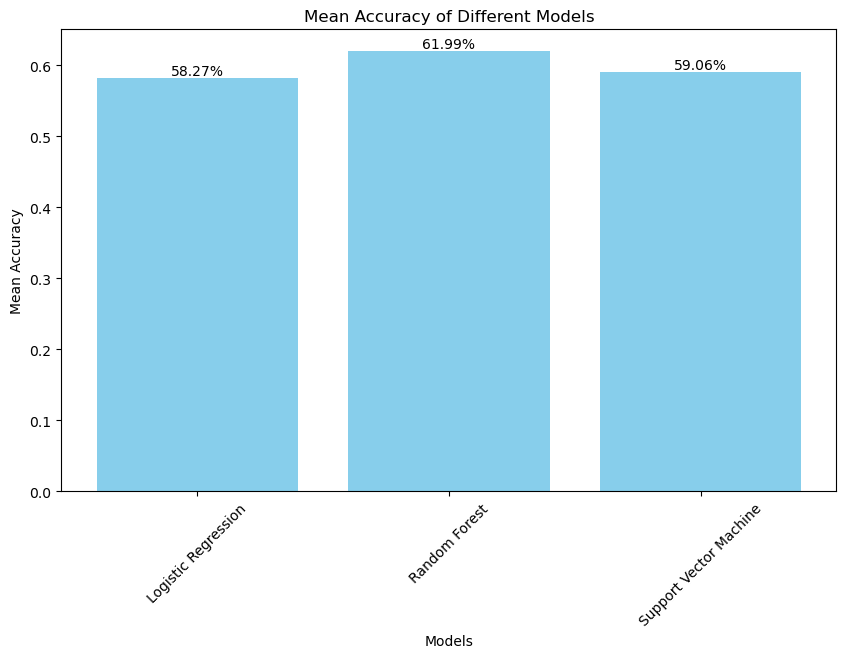

In [40]:
import matplotlib.pyplot as plt

# Visualize mean accuracy scores of different models with percentage labels
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_scores.keys(), mean_scores.values(), color='skyblue')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('mean_accuracy_plot.png', bbox_inches='tight')
plt.show()


### Applying Hyperparameter tuning 

#### hyperparameter tuning on random forest

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy of the Best Model: 0.723404255319149


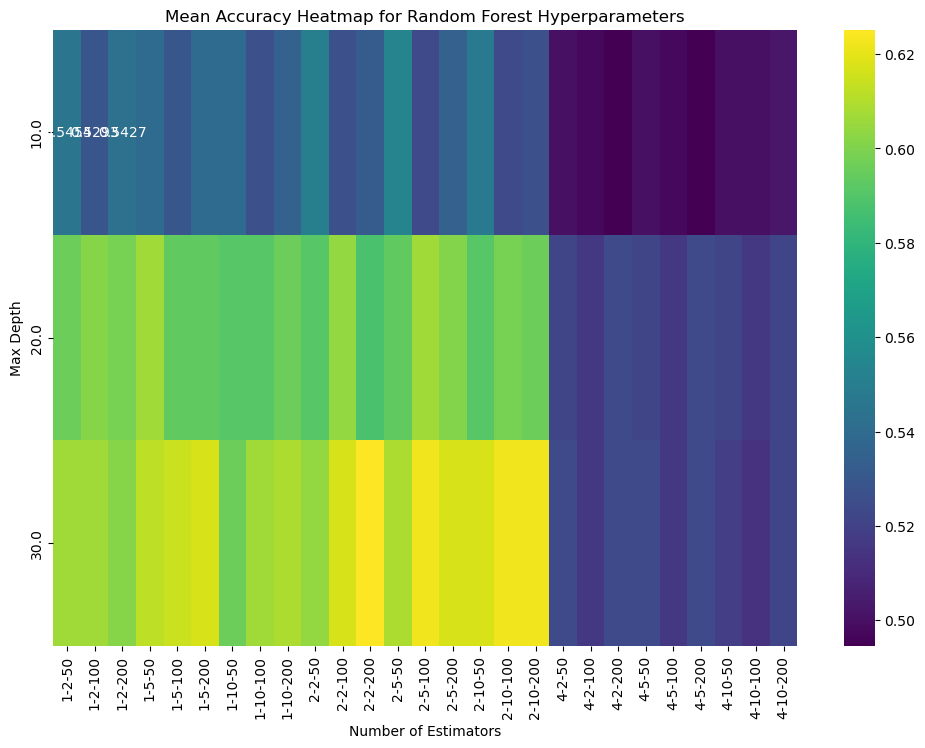

In [42]:
# Extract the mean cross-validated scores and hyperparameters from the grid search results
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Create a DataFrame to store the results
df_results = pd.DataFrame(params)
df_results['Mean Accuracy'] = mean_scores

# Reshape the DataFrame to have hyperparameters as columns
df_pivot = df_results.pivot_table(index='max_depth', columns=['min_samples_leaf', 'min_samples_split', 'n_estimators'], values='Mean Accuracy')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='viridis', fmt=".4f")
plt.title('Mean Accuracy Heatmap for Random Forest Hyperparameters')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()


In [43]:
# hpm tuning on svm 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_svm_model.score(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy of the Best Model: 0.7659574468085106


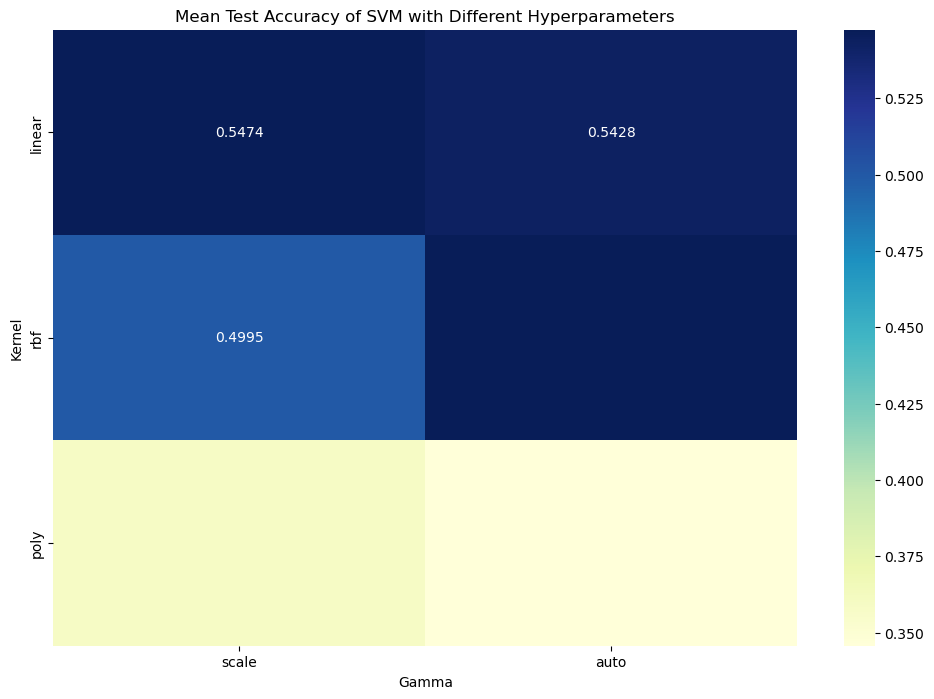

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting grid search results
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Reshape mean test scores to create a grid
mean_test_scores_grid = mean_test_scores.reshape(len(param_grid['C']), len(param_grid['kernel']), len(param_grid['gamma']))

# Create a heatmap to visualize the mean test scores
plt.figure(figsize=(12, 8))
sns.heatmap(mean_test_scores_grid.mean(axis=0), annot=True, fmt='.4f', cmap='YlGnBu', 
            xticklabels=param_grid['gamma'], yticklabels=param_grid['kernel'])
plt.xlabel('Gamma')
plt.ylabel('Kernel')
plt.title('Mean Test Accuracy of SVM with Different Hyperparameters')
plt.show()


In [45]:
# hprprmtr tuning for logistic rgrsn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type (L1 or L2 regularization)
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_logreg_model.score(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy of the Best Model: 0.7659574468085106


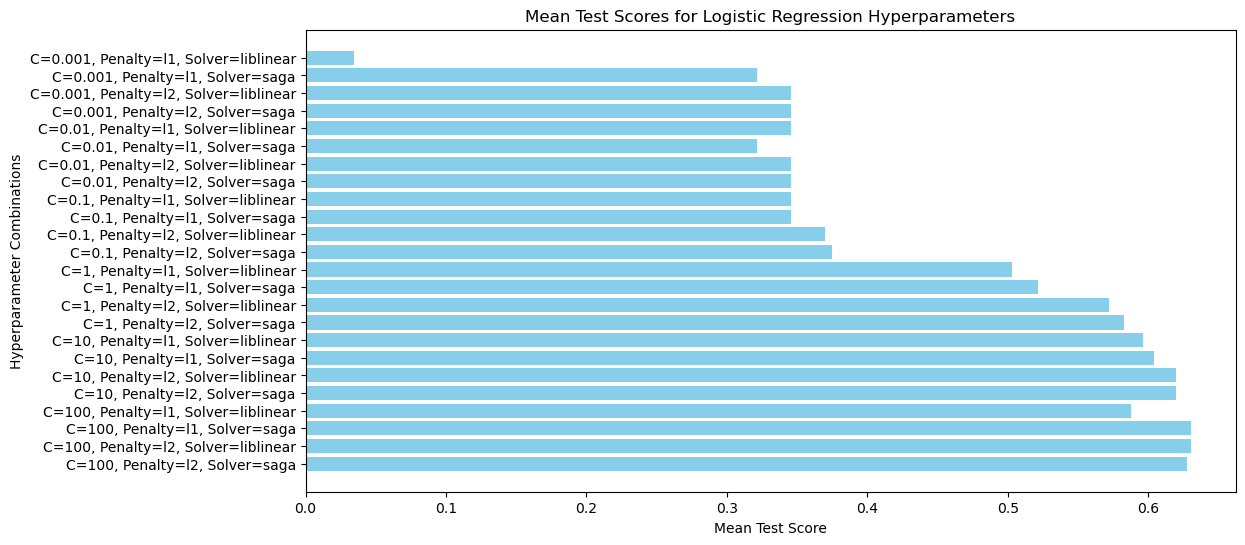

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the mean cross-validated accuracy scores from the grid search results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Create an array to represent the combinations of hyperparameters
param_combinations = [f"C={c}, Penalty={p}, Solver={s}" 
                      for c in param_grid['C'] 
                      for p in param_grid['penalty'] 
                      for s in param_grid['solver']]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(param_combinations, mean_test_scores, color='skyblue')
plt.xlabel('Mean Test Score')
plt.ylabel('Hyperparameter Combinations')
plt.title('Mean Test Scores for Logistic Regression Hyperparameters')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


In [47]:
# Save the trained model to disk
from joblib import dump
dump(best_logreg_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']